In [1]:
import numpy as np
import random
import math

In [2]:
def positive_or_negative():
    if random.random() < 0.5:
        return 1
    else:
        return -1
    
no_of_points = 100
width, height = 100, 100

# equation: y = x^2

class Centres:
    def __init__(self, x, y, radius):
        self.x = x
        self.y = y
        self.radius = radius
        
    def random_point_on_sphere(self):
        random_x = self.x + random.uniform(0, self.radius) * positive_or_negative()
        random_y = self.y + math.sqrt(abs(math.pow(self.radius,2) - math.pow(random_x,2))) * positive_or_negative()
        return Centres(random_x, random_y, 0)
        
    def uniformSphere(self, n = no_of_points):
        random_points = {k: self.random_point_on_sphere() for k in range(n)}
        return random_points
            
    def get_position(self):
        return (self.x, self.y)
    
    def get_x_pos(self):
        return self.x
    
    def get_y_pos(self):
        return self.y
    
    def class_of_point(self):
        if self.y < self.x :
            return -1
        else: 
            return 1
         
    def prop_missclassified(self):
        count = 0
        centreClass = self.class_of_point()
        
        for randomPoint in self.uniformSphere().values():
            #print(randomPoint.get_x_pos())
            #print(randomPoint.get_y_pos())  
            #print(randomPoint.class_of_point())
            if centreClass * randomPoint.class_of_point() < 0: count += 1
                
        return count/no_of_points
 
'''
random_Centres = {k: Centres(random.randrange(-1 * width, width), random.randrange(-1 * height, height), 10) for k in range(100)}

for centre in random_Centres.values():
    print(centre.get_position())
    print(centre.class_of_point())

'''

'\nrandom_Centres = {k: Centres(random.randrange(-1 * width, width), random.randrange(-1 * height, height), 10) for k in range(100)}\n\nfor centre in random_Centres.values():\n    print(centre.get_position())\n    print(centre.class_of_point())\n\n'

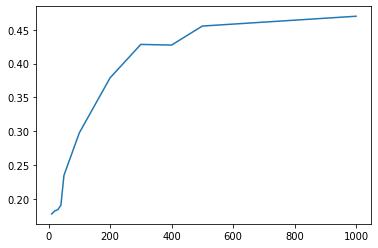

In [3]:
no_of_points = 100

def prop_as_a_func_of_radius(radius):
    
    random_Centres = {k: Centres(random.randrange(-1 * width, width), random.randrange(-1 * height, height), radius) for k in range(no_of_points)}
    count = 0
    for centre in random_Centres.values():
        count += centre.prop_missclassified()
    return count/no_of_points

import matplotlib.pyplot as plt
%matplotlib inline

x_values = [10,20,30,40,50,100,200,300,400,500,1000]
y_values = [prop_as_a_func_of_radius(10),prop_as_a_func_of_radius(20),prop_as_a_func_of_radius(30),prop_as_a_func_of_radius(40),prop_as_a_func_of_radius(50),prop_as_a_func_of_radius(100),prop_as_a_func_of_radius(200),prop_as_a_func_of_radius(300),prop_as_a_func_of_radius(400),prop_as_a_func_of_radius(500),prop_as_a_func_of_radius(1000)]

plt.plot(x_values, y_values)


In [4]:
Point = Centres(0,0,10)
Point.uniformSphere(100)
Point.prop_missclassified()

0.44